{% include toc title="In This Lesson" icon="file-text" %}


## Get started with date formats in Python

In this tutorial, we will look at the date time format - which is important for
plotting and working with time series data in R.


<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

At the end of this activity, you will be able to:

* Convert column in a dataframe containing dates / times to a date/time object that can be used in Python.
* Be able to describe how we can use the 'date' class to create easier to read time series plots in `Python`.


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You need `Python 3.x` and `Jupyter notebooks` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)
* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)
* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)

</div>


In this tutorial, we will learn how to convert data that contain dates and times
into a date / time format in `Python`. To begin, let's revisit the boulder precip data that we've been working with in this module.

In [1]:
#import earthlab as et
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.ion()
# be sure to set your working directory\n",
os.chdir("/Users/lewa8222/Documents/earth-analytics/")

## Plot using pandas 

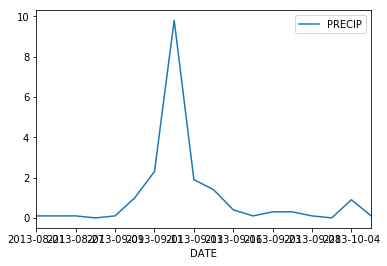

In [4]:
boulder_precip = pd.read_csv('data/boulder-precip.csv')
boulder_precip.plot('DATE', 'PRECIP')

## Plot using matplotlib

We can use matplotlib plotting to further customize our plots, so let's use that instead.

ValueError: could not convert string to float: '2013-10-11'

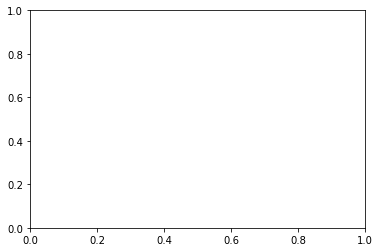

In [5]:
# is there some way to get abridged error messages that are easier to understand in python?

fig, ax= plt.subplots()
ax.plot('DATE', 'PRECIP', data=boulder_precip)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Date",
       ylabel="Total Precipitation (Inches)",
       title="Precipitation Data\nBoulder, Colorado 2013");


Notice when we try to plot the data, we get an error - take note of the very last
python error message. 

`ValueError: could not convert string to float: '2013-10-11'`

Let's look closely at the STRUCTURE of the data to understand why Python is not able to plot our data.

In [7]:
# not sure how this maps onto python
boulder_precip.dtypes

Unnamed: 0      int64
DATE           object
PRECIP        float64
dtype: object

Looking at the structure of our data, we see that the DATE field is of type `object`. However ideally we want Python to read this column as a date so we can work with it as a chronological element rather than a string or some other format.

## Python Data types 

The structure results above tell us that the data columns in our `data.frame`
are stored as several different data types or `classes` as follows:

* **int64 - Character:** 64 bit integer. This is a numeric value that will never contain decimal points.
* **object:** what is this??.
* **float64 - 64 bit float:**  This data type accepts data that are a wide variety of numeric formats
including decimals (floating point values) and integers. Numeric also accept
larger numbers than **int** will.

### Data frame columns can only contain one data class

A `data.frame` column can only store on type. This means that a column can not
store both numbers and strings. If a column contains a list of numbers and one
letter, then the entire column will stored as a `chr` (character).

Storing
variables using different `types` is a strategic decision by `Python` (and
other programming languages) that optimizes processing and storage. It allows:

* data to be processed more quickly & efficiently.
* the program (`Python`) to minimize the storage size.

Remember, that we also discussed classes during class in these lessons: [vectors in R - data classes]({{ site.url }}/course-materials/earth-analytics-python/week-2/work-with-data-types-r/)

## Dates stored as characters
Note that the Date column in our data.frame is of class object. This
means that Python  is reading dates in as objects rather than dates that
contain a value that is sequential.

In [8]:
boulder_precip.dtypes

dtype('O')

Thus, when we plot, `Python` gets stuck trying to plot the DATE field. Each value is read as a string and it's difficult to try to fit all of those values on the x axis efficiently. 
We can avoid this problem by explicetly importing our data using a dates argument as follows:

`parse_dates=['columnNameWithDatesHere']`

Let's give it a try

In [11]:
boulder_precip = pd.read_csv('data/boulder-precip.csv',
                             parse_dates=['DATE'])
boulder_precip.dtypes

Unnamed: 0             int64
DATE          datetime64[ns]
PRECIP               float64
dtype: object

This looks much better. now the DATE column is of type: `datetime64`.
Let's try to plot again.

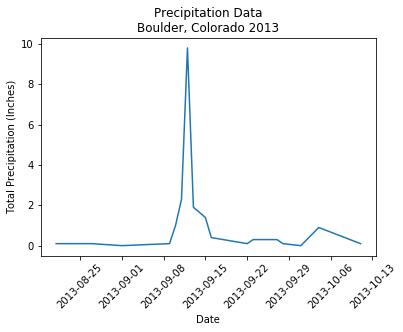

In [12]:
fig, ax= plt.subplots()
ax.plot('DATE', 'PRECIP', data=boulder_precip)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Date",
       ylabel="Total Precipitation (Inches)",
       title="Precipitation Data\nBoulder, Colorado 2013");

Notice that now our x-axis date values are easier to read as Python 
knows how to only show incremental values rather than each and every date value. We can plot our data as a barplot too.

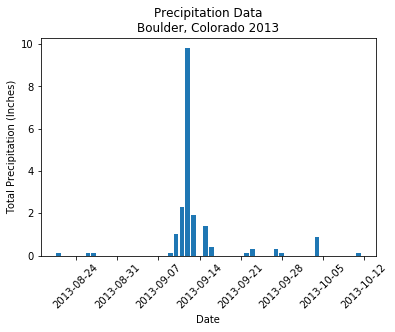

In [14]:
fig, ax= plt.subplots()
ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Date",
       ylabel="Total Precipitation (Inches)",
       title="Precipitation Data\nBoulder, Colorado 2013");